使用神经网络解决分类问题主要分为以下4个步骤：<br/>
1. 提取问题中实体的特征向量作为神经网络的输入。<br/>
2. 定义神经网络结构，定义如何从神经网络输入得到输出。这个过程称为神经网络的前向传播算法。<br/>
3. 通过训练数据来调整神经网络结构中参数的取值，这就是神经网络的过程。<br/>
4. 使用训练好的神经网络预测测试数据。<br/>

## 前向传播算法
一个神经元可以有多个输入和一个输出。每个神经元的输入既可以是其他神经元的输出，也可以是整个神经网络结构的输入。所谓神经网络的结构指的是不同神经元之间的连接结构。<br/>
<div style="width: 50%; height: 50%;">
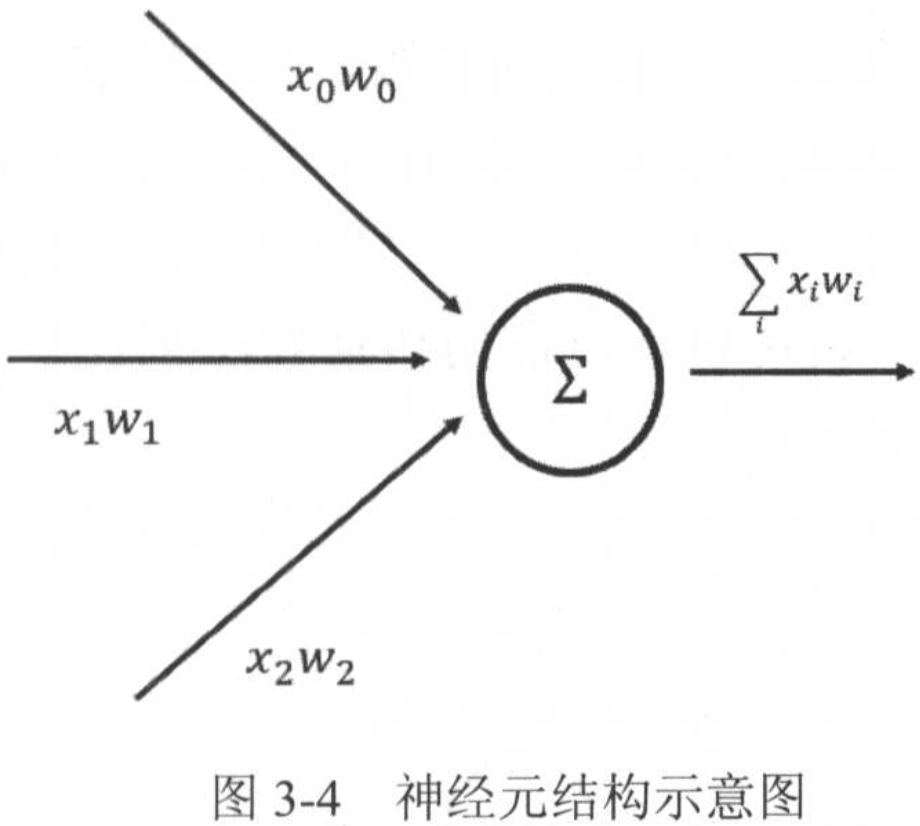
</div>
从图可以看出，一个简单的神经元的输出是所有输入的加权和，而不同输入的权重就是神经元的参数。神经网络的优化过程就是神经元中参数的取值过程。<br/>
计算神经网络的前向传播结果需要三部分信息。<br/>
- 神经网络的输入。神经网络的输入就是从实体中提取的特征向量。<br/>
- 神经网络的连接结构。神经网络的结构由神经元构成，神经网络的结构给出不同神经元之间输入输出的连接关系。神经网络中的神经元也称为节点。<br/>
- 每个神经元的参数。用$W$来表示神经元中的参数。$W$的上标表示神经网络的层数，$W^{(1)}$表示第一层节点的参数。$W$的下标表明连接节点的编号。$W^{(1)}_{1,2}$表示连接$x_1$和$a_{12}$节点的边上的权重。<br/>

给定神经网络的输入、神经网络的连接结构以及其边上的权重，就可以通过前向传播算法计算神经网络的输出。<br/>
## 神经网络参数与TensorFlow变量
在TensorFlow中，变量(tf.Variable)的作用就是保存和更新神经网络的参数，TensorFlow的变量也需要指定初始值。在神经网络中，参数的初始值可以设置为随机数、常量或者其他变量的初始值计算得到，最常见的是给参数赋予随机初始值。<br/>
随机初始化变量的值代码如下：<br/>

In [1]:
import tensorflow as tf
# 产生一个2*3的矩阵，矩阵的元素均值为0，标准差为2的随机数。可以通过参数mean指定平均值
weights = tf.Variable(tf.random_normal([2,3], stddev=2))

TensorFlow目前支持的所有随机数生成器。<br/>

| 函数名称 | 随机数分布 | 主要参数 | 
| --------   | :-----  | :----  |
| tf.random_normal | 正态分布 | 平均值、标准值、取值类型 |
| tf.truncated_normal | 正态分布，如果随机出来的值平均值超过2个标准差，那么重新随机 | 平均值、标准值、取值类型 |
| tf.random_uniform | 均匀分布 | 最小、最大取值、取值类型| 
| tf.random_gamma | Gamma分布 | 形状参数alpha、尺度参数beta、取值类型| 

TensorFlow也支持常量来初始化一个变量，常见的常量声明方法。<br/>

| 函数名称 | 功能 |
| --------   | :-----  |
| tf.zeros | 产生全0的数组 |
| tf.ones | 产生全1的数组 |
| tf.fill | 产生一个全部为给定数字的数组 |
| tf.constant | 给定一个值的常量 |

在神经网络中，偏置项(bias)通常会使用常数来设置初始值。

In [2]:
import tensorflow as tf

# 初始长度为3，值为0的变量
bias = tf.Variable(tf.zeros([3]))

除了使用随机数或常数，TensorFlow也支持通过其他变量的初始值来初始化新的变量。

In [4]:
w2 = tf.Variable(weights.initialized_value())
w3 = tf.Variable(weights.initialized_value() * 2.0)

在TensorFlow中，一个变量的值被使用之前，这个变量的初始化过程必须被明确调用。

In [5]:
sess = tf.Session()
# 初始化上述声明的变量w2和w3
sess.run(w2.initializer)
sess.run(w3.initializer)
sess.close()

虽然上述方式可以实现对变量的初始化过程调用，但是当变量很多时，就显得比较繁琐。TensorFlow提供了一种更加便捷的方式来完成变量初始化过程。通过`tf.global_variables_initializer()`函数，不需要变量一个一个初始化，这个函数也会自动处理变量之间的依赖关系。

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.close()

在TensorFlow中，变量的声明函数tf.Variable是一个运算，运算的输出结果是一个张量，所以变量是一种特殊的张量。<br/>
<div style="width: 80%; height: 80%;">
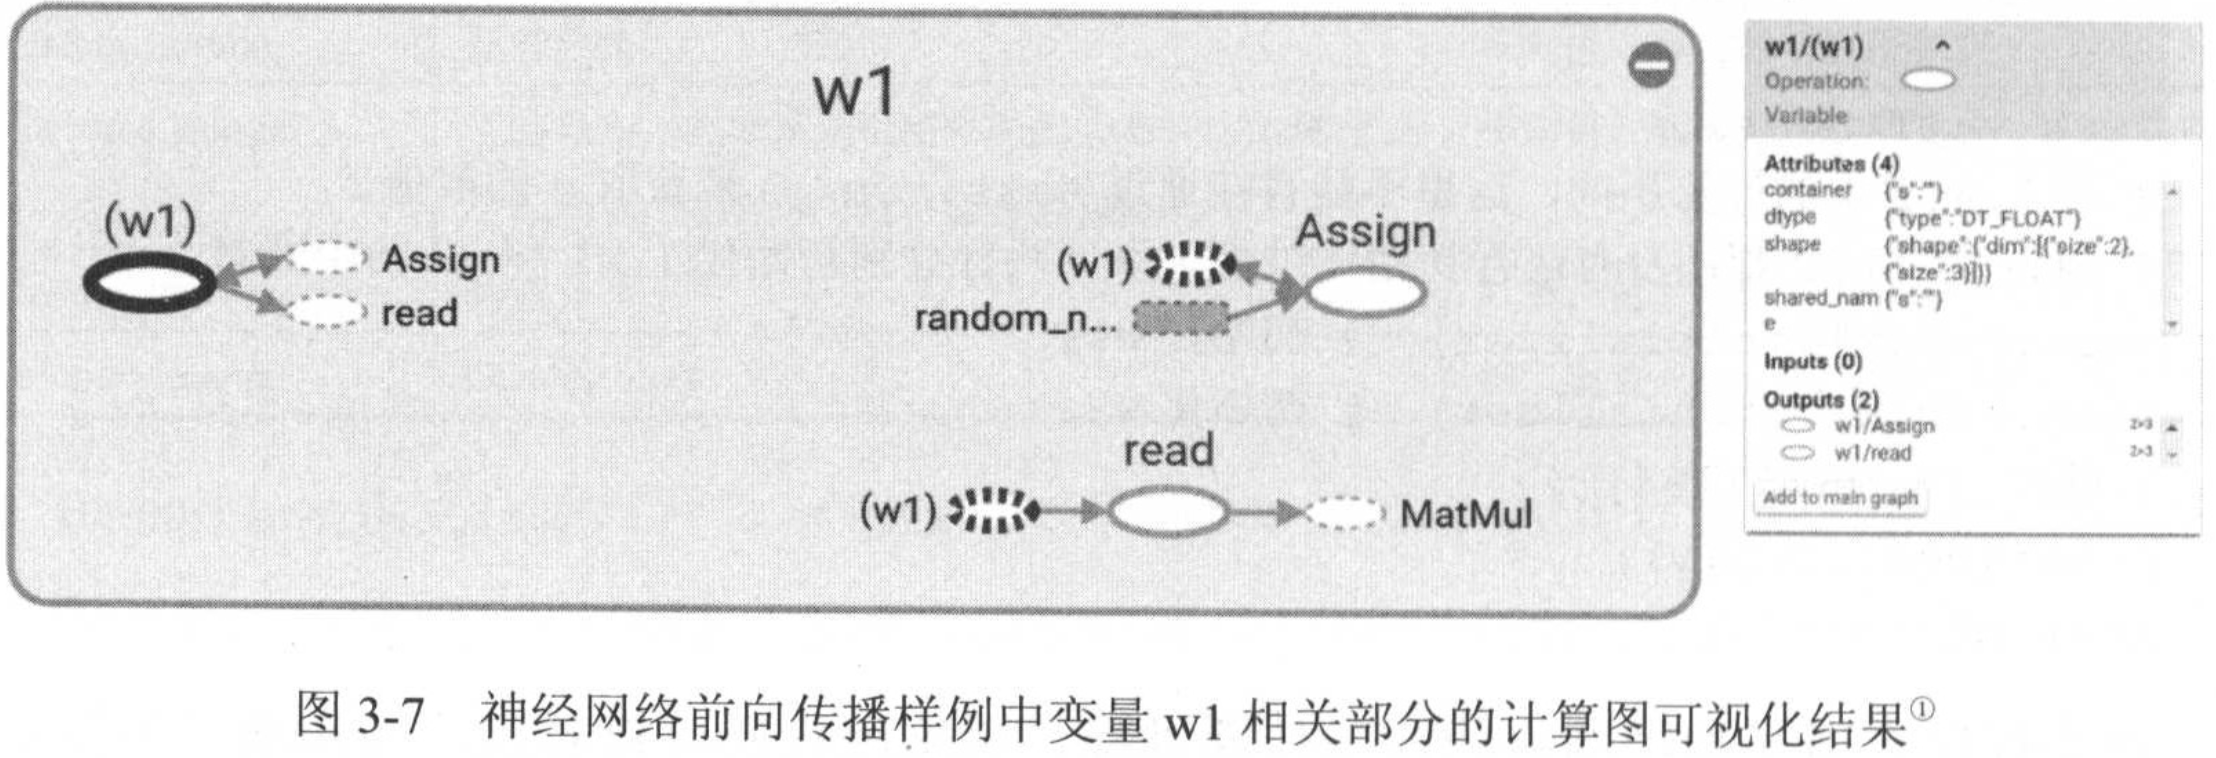
</div>
从上图黑色椭圆代表变量w1，w1是一个Variable运算。这张图w1通过一个read操作将值提供给一个乘法运算，初始化变量w1的操作通过Assign操作完成。Assign节点的输入为随机数生成函数的输出，而输出赋给变量w1。<br/>
在TensorFlow中，所有的变量都会被自动加入到GraphKeys.VARIABLES集合中。通过`tf.global_variables()`函数可以拿到当前计算图上所有的变量，这有助于持久化整个计算图的运行状态。<br/>
在构建机器学习模型时，可以通过变量声明函数中的`trainable`参数来区分待优化参数和超参数。如果声明变量时参数trainable为True，那么这个变量会自动加入到`GraphKeys.TRAINABLE_VARIABLES`集合。在TensorFlow中可以通过`tf.trainable_variables`函数得到所有需要优化的参数。TensorFlow中提供的神经网络优化算法会将GraphKeys.TRAINABLE_VARIABLES集合中的变量作为默认的优化对象。<br/>
一个变量构建之后，类型不可再改变。<br/>
变量的维度在程序运行过程中有可能被改变，但是需要设置参数validate_shape=False。该做法罕见。<br/>
## 通过TensorFlow训练神经网络模型
在神经网络优化算法中，最常见的方法是反向传播算法。反向传播算法实现了一个迭代过程，在每次迭代的开始，首先需要选取一小部分训练数据，这一小部分数据成为一个batch。这个batch样例通过前向传播算法得到神经网络模型的预测结果，再计算出模型预测结果和真实值之间差值，利用反向传播算法相应更新神经网络参数的值，使得这个batch在神经网络上的预测结果和真实值更接近。<br/>
使用TensorFlow来表达一个batch数据，如果每轮迭代中选取的数据都要通过常量来表示，那么TensorFlow计算图就会非常大。因为每生成一个变量，TensorFlow都会往计算图中增加一个节点。通常情况下，神经网络的训练过程的迭代次数比较大，这样计算图会非常大，并且利用率很低。为了避免这个问题，TensorFlow提供了placeholder机制用于输入数据。placeholder相当于定义一个位置，这个位置中的数据在程序运行时再指定。这样就不需要生成大量常量来提供输入数据，而只需要将数据通过placeholder传入TensorFlow计算图。在placeholder的数据类型需要指定，且不可改变。但是placeholer的维度信息可以自动推导出来，不需要指定。在计算前向传播结果时，需要提供一个`feed_dict`来指定输入的值。<br/>

In [ ]:
x = tf.placeholder(tf.float32, shape(3,2), name="input")
print(sess.run(y, feed_dict={x:[[.7,.9], [.1,.4], [.5,.8]]}))

在得到一个batch的前向传播结果之后，需要定义一个损失函数来表示当前预测值与真实值之间的差值，然后通过定义反向传播算法更新神经网络结构的参数值的优化方式，更新参数值使差值减少。<br/>
TensorFlow支持10种不同的优化器，比较常见的优化器有三种：`tf.train.GradientDescentOptimizer`、`tf.train.AdamOptimizer`和`tf.train.MomentumOptimizer`。在定义了反向传播算法之后，通过运行sess.run(train_step)就可以对所有在GraphKeys.`TRAINABLE_VARIABLES`集合中的变量进行优化，使得在当前batch下损失函数更小。<br/>
## 神经网络样例程序
训练神经网络的过程可以分为以下三个步骤：
1. 定义神经网络的结构和前向传播的输出结果。
2. 定义损失函数以及选择反向传播优化的算法。
3. 生成会话并且在训练数据上反复运行反向传播优化算法。

In [14]:
import tensorflow as tf
from numpy.random import RandomState

# 定义训练数据batch的大小
batch_size = 8
# 定义神经网络的参数
w1 = tf.Variable(tf.random_normal([2, 3], stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1], stddev=1, seed=1))
# 在shape的第一个维度上使用None可以方便使用不同batch大小
x = tf.placeholder(tf.float32, shape=(None, 2), name="x-input")
y_ = tf.placeholder(tf.float32, shape=(None, 1), name="y-input")
# 定义神经网络前向传播过程
# tf.matmul是矩阵相乘, tf.multiply或者x*w1是矩阵的element-wise
a = tf.matmul(x, w1)
y = tf.matmul(a, w2)
# 定义损失函数和反向传播算法
y = tf.sigmoid(y)
cross_entropy = - tf.reduce_mean(y*tf.log(tf.clip_by_value(y, 1e-10, 1.0)) 
                                 + (1-y)*tf.log(tf.clip_by_value(1-y, 1e-10, 1.0)))
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)
# 通过随机数产生一个数据集
rdm = RandomState(1)
dataset_size = 128

X = rdm.rand(dataset_size, 2)
Y = [[int(x1+x2 < 1)] for(x1, x2) in X]

# 创建会话运行TensorFlow程序
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("训练之前神经网络参数值：")
    print(sess.run(w1))
    print(sess.run(w2))
    
    STEPS = 5000
    for i in range(STEPS):
        # 每次选取batch_size个样本用于训练
        start = (i * batch_size) % dataset_size
        end = min(start+batch_size, dataset_size)
        # 通过选取的样本训练神经网络并更新参数
        sess.run(train_step, feed_dict={x:X[start:end], y_:Y[start:end]})
        if i % 1000 == 0:
            total_cross_entropy = sess.run(cross_entropy, feed_dict={x: X, y_: Y})
            print("After %d train steps, cross entropy on all data is %g" % (i, total_cross_entropy))
    print("训练后神经网络参数值：")
    print(sess.run(w1))
    print(sess.run(w2))

训练之前神经网络参数值：
[[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
[[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]
After 0 train steps, cross entropy on all data is 0.314006
After 1000 train steps, cross entropy on all data is 0.0684551
After 2000 train steps, cross entropy on all data is 0.033715
After 3000 train steps, cross entropy on all data is 0.020558
After 4000 train steps, cross entropy on all data is 0.0136867
训练后神经网络参数值：
[[-2.548655   3.0793087  2.8951712]
 [-4.1112747  1.6259071  3.3972702]]
[[-2.3230937]
 [ 3.3011687]
 [ 2.4632082]]
